In [12]:
import sys
import os

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from few.trajectory.inspiral import EMRIInspiral
from few.waveform import GenerateEMRIWaveform
from few.summation.aakwave import AAKSummation
from few.waveform import Pn5AAKWaveform, AAKWaveformBase
from few.utils.utility import *

import GWGen
from GWGen.WFGenerator import *

# set initial parameters
M = 1e5
mu = 1e1
a = .9
p0 = 34.95
e0 = 0.2
iota0 = 0.
Y0 = np.cos(iota0)
Phi_phi0 = 0.
Phi_theta0 = 0.
Phi_r0 = 0.


qS = np.pi/4
phiS = 0.
qK = 1e-6
phiK = 0.
dist = 1.0
mich = False
dt = 15
T = 4

# FEW 5PN AAK model

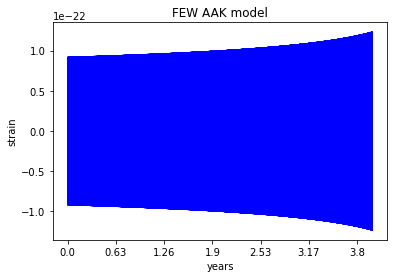

In [22]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "DENSE_STEPPING": 0,  # we want a sparsely sampled trajectory
    "max_init_len": int(1e4),  # all of the trajectories will be well under len = 1000
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wave_generator = Pn5AAKWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)
FEWwaveform = wave_generator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

t = np.arange(len(FEWwaveform)) * dt;
wf = FEWwaveform
plt.plot(t, wf.real, color='black');
plt.plot(t, wf.imag,color='blue');
plt.title("FEW AAK model");
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
plt.xticks(ticks, newlabs);
plt.xlabel("years");
plt.ylabel("strain");

# My Model

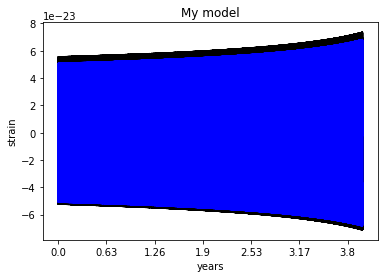

In [24]:
use_gpu = False

# keyword arguments for inspiral generator (RunKerrGenericPn5Inspiral)
inspiral_kwargs = {
    "npoints": 110,  # we want a densely sampled trajectory
    "dense_output": True
}

# keyword arguments for summation generator (AAKSummation)
sum_kwargs = {
    "use_gpu": use_gpu,  # GPU is availabel for this type of summation
    "pad_output": False,
}

wfgenerator = EMRIWaveform(inspiral_kwargs=inspiral_kwargs, sum_kwargs=sum_kwargs, use_gpu=False)

mywf = wfgenerator(M, mu, a, p0, e0, Y0, qS, phiS, qK, phiK, dist,Phi_phi0=Phi_phi0, Phi_theta0=Phi_theta0, Phi_r0=Phi_r0, mich=mich, dt=dt, T=T)

t = np.arange(len(mywf)) * dt
plt.plot(t, mywf.real, color='black');
plt.plot(t, mywf.imag,color='blue');
plt.title("My model");
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*365))];
plt.xticks(ticks, newlabs);
plt.xlabel("years");
plt.ylabel("strain");

# Mismatch

In [25]:
print("mismatch between FEW AAK waveform and my waveform")
print(get_mismatch(FEWwaveform.real, mywf.real))

mismatch between FEW AAK waveform and my waveform
1.0000294705457802


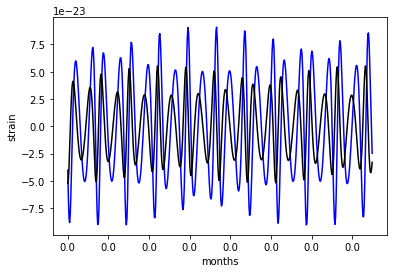

In [17]:
st = 0
stop = 500
dom = t[st:stop]
ran1 = FEWwaveform.real[st:stop]
#ran2 = testwf.real[st:stop]
ran3 = mywf.real[st:stop]
plt.plot(dom,ran1, label="FEW waveform",color="blue")
#plt.plot(dom, ran2, label="example PN waveform")
plt.plot(dom, ran3, label="my waveform",color="black");
ticks = plt.xticks()[0][1:-1];
newlabs = [int(i)/100 for i in (ticks*100/(60*60*24*31))];
plt.xticks(ticks, newlabs);
plt.xlabel("months");
plt.ylabel("strain");